# Importing libraries

We have chosen to use the PyTorch library to build our DCGAN model 

In [49]:
import os 

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as dset
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.utils as vutils
import numpy as np

## "Hyperparameters to "change" the whole model 

In [106]:
# input definitions
dataroot = "./Data/monet_jpg/"

# Our original picture size is 256x256
image_size = 65

batch_size= 1

ngpu = 1

# Change the normalization of the real input images.



## Code notes

**https://www.kaggle.com/code/ninamaamary/dcgan-artist** : DCGAN example from Kaggle.

**path_list = os.listdir(img_dir) :** Creates a list with all the file names in the dictionary. \
**abspath = os.path.abspath(img_dir) :** creates a list with all the complete paths, so all these small files names joined with the root path. Such that each picture now has its unique path in the list. 

**transforms.Normalize() :** Normalize range of R, B and G. ([mean], [std]). Helps CNN to peform better. Have this match with the generator, such that we create pictures in the same range of colors

**ToTensor() :** Takes the image and converts it to the pytorch own picture format. 

**The transform.Compose "function" :** It changes the image to a PyTorch format, and is able to "change" the picture in certain ways. 


## Questions... ? (we are confused)

- Why do we need a batchsize in the Dataloader?
- Why do we shuffle in the Dataloader? 


In [107]:
#import dataset 
class Dataset(Dataset):
    
    def __init__(self, img_dir):
        path_list = os.listdir(img_dir)
        abspath = os.path.abspath(img_dir)

        self.img_list = [os.path.join(abspath, path) for path in path_list]

        self.transform = transforms.Compose([
            transforms.Resize(image_size),
            # transforms.CenterCrop(image_size), # Crops the image, doesn't make sense to use. 
            transforms.ToTensor(),
            # transforms.Normalize([1, 0.5, 10], [1, 0.5, 10]), # Makes the picture green. 
            transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),
            # transforms.Normalize([1, 1, 1], [1, 1, 1]),
            ############################### Normalize range of R, B and G. ([mean], [std]). Helps CNN to peform better. 
        ])


    def __len__(self):
        return len(self.img_list)


    def __getitem__(self, index):
        path = self.img_list[index]
        img = Image.open(path).convert('RGB')
        return self.transform(img)

In [108]:
monet_dataset = Dataset(dataroot)

data_loader = DataLoader(monet_dataset, batch_size=batch_size, shuffle=True)

In [116]:
# Get an example of what a picture looks like, note that there is our 3 layers of color.
print(monet_dataset[0])

tensor([[[ 0.4902,  0.5529,  0.5686,  ...,  0.7804,  0.7804,  0.7020],
         [ 0.5059,  0.5765,  0.5137,  ...,  0.8039,  0.7961,  0.7569],
         [ 0.5216,  0.5765,  0.5294,  ...,  0.8118,  0.8039,  0.7961],
         ...,
         [ 0.6392,  0.5922,  0.5451,  ..., -0.1294,  0.0745,  0.0039],
         [ 0.4902,  0.4902,  0.4510,  ..., -0.0588,  0.0510,  0.0431],
         [ 0.4588,  0.4118,  0.3882,  ..., -0.0039,  0.0275,  0.0667]],

        [[ 0.4902,  0.5765,  0.6235,  ...,  0.7333,  0.7176,  0.6078],
         [ 0.5686,  0.6549,  0.6078,  ...,  0.7412,  0.7255,  0.6549],
         [ 0.6471,  0.7020,  0.6627,  ...,  0.7412,  0.7255,  0.6784],
         ...,
         [ 0.3569,  0.3804,  0.3882,  ..., -0.4745, -0.3569, -0.5529],
         [ 0.3333,  0.4353,  0.4902,  ..., -0.4039, -0.4196, -0.5922],
         [ 0.3569,  0.4275,  0.4980,  ..., -0.1608, -0.2627, -0.3961]],

        [[ 0.3098,  0.4667,  0.5686,  ...,  0.6471,  0.6078,  0.4275],
         [ 0.5294,  0.6549,  0.6078,  ...,  0

## Plotting an image, just for fun.

Code is directly taken from: 
https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html

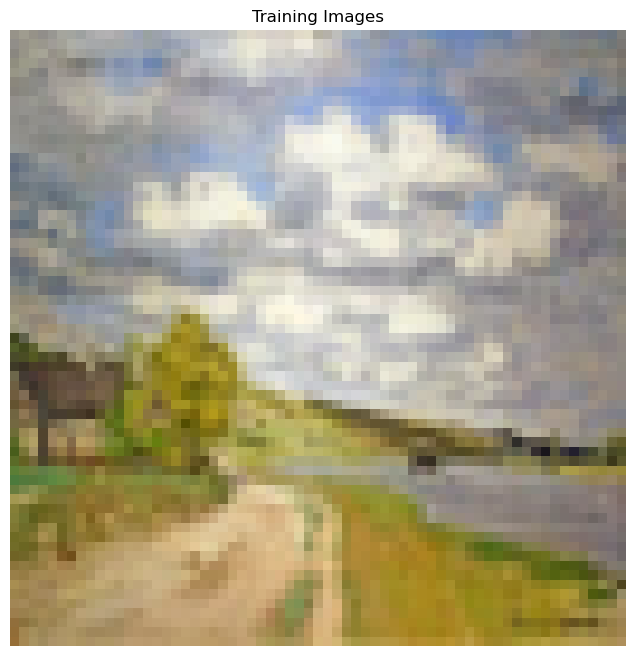

In [109]:
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

real_batch = next(iter(data_loader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))
plt.show()

In [ ]:
#generator class

In [ ]:
#discriminator class
class Discriminator(nn.Module):
    #ting sker her
    
    pass

In [ ]:
#results